# Applying the CNN model on oversampled dataset and the augmented dataset using ImageDataGenerator.

Programmer: Sandesh Reddy Pendyala

Purpose: Implementation of CNN.

In [1]:
# Importing Tensorflow and keras libraries and packages necessary to build the model
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Original dataset paths
old_train_dir = "D:\\Blindness Detection\\New\\new_train\\"
old_valid_dir = "D:\\Blindness Detection\\New\\new_valid\\"

# Oversampled dataset paths
new_train_dir = "D:\\Blindness Detection\\Data\\sampled_split\\sample_train\\"
new_valid_dir = "D:\\Blindness Detection\\Data\\sampled_split\\sample_valid\\"

# Convolutional Neural Network Model

In [3]:
batch_size = 32                               # number of samples that will be generated throw the network is set to 32
epochs = 10                                   # we iterate through 10 times by setting the value of epoch to 10
IMG_HEIGHT = 150                              # images height set to 150
IMG_WIDTH = 150                               # image width is set to 150

## On oversampled dataset

In [4]:
train_img_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_img_gen.flow_from_directory(directory=new_train_dir, 
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                   batch_size=batch_size, 
                                                   class_mode='categorical', shuffle=True)


Found 6488 images belonging to 5 classes.


In [5]:
val_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_img_gen.flow_from_directory(directory=new_valid_dir, 
                                               target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                               batch_size=batch_size, 
                                               class_mode='categorical')


Found 1625 images belonging to 5 classes.


In [6]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
history = model.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

Epoch 1/10
203/203 [==============================] - 1311s 6s/step - loss: 1.0213 - accuracy: 0.5689 - val_loss: 1.0167 - val_accuracy: 0.5785
Epoch 2/10
203/203 [==============================] - 1199s 6s/step - loss: 0.9558 - accuracy: 0.6054 - val_loss: 0.9841 - val_accuracy: 0.5748
Epoch 3/10
203/203 [==============================] - 1309s 6s/step - loss: 0.8671 - accuracy: 0.6492 - val_loss: 0.9916 - val_accuracy: 0.5938
Epoch 4/10
203/203 [==============================] - 1661s 8s/step - loss: 0.7516 - accuracy: 0.7096 - val_loss: 1.0239 - val_accuracy: 0.5889
Epoch 5/10
203/203 [==============================] - 1565s 8s/step - loss: 0.5745 - accuracy: 0.7845 - val_loss: 1.0996 - val_accuracy: 0.6006
Epoch 6/10
203/203 [==============================] - 1187s 6s/step - loss: 0.3950 - accuracy: 0.8553 - val_loss: 1.3666 - val_accuracy: 0.5643
Epoch 7/10
203/203 [==============================] - 1219s 6s/step - loss: 0.2589 - accuracy: 0.9106 - val_loss: 1.6664 - val_accuracy:

### Plotting Accuracy and Validation curve for the oversampled dataset

In [20]:
#VISUALIZATION OF ACCURACY AFTER AUGMENTATION
import matplotlib.pyplot as plt

def acc_loss_plot(history, epochs):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    #training and validation accuracy curve

    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    #training and validation loss curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

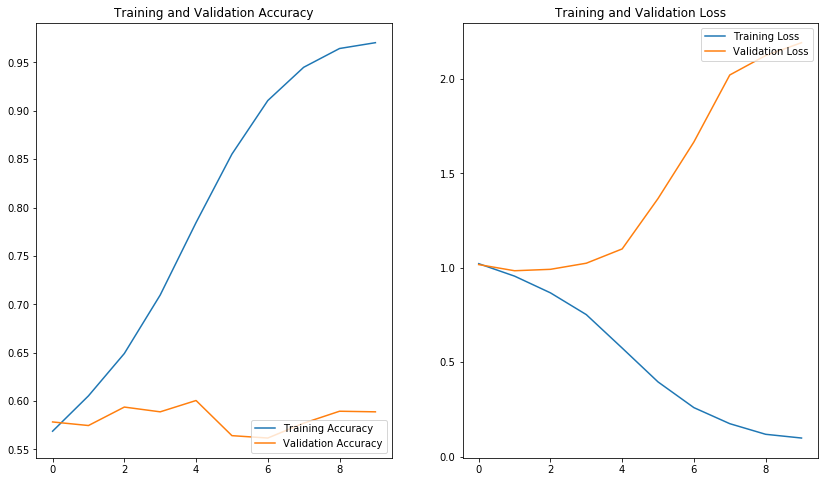

In [21]:
acc_loss_plot(history, epochs)

## Applying model on augmented dataset using ImageDataGenerator 

In [22]:
train_image_generator = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)


train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=old_train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 2632 images belonging to 5 classes.


In [23]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=old_valid_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 466 images belonging to 5 classes.


In [28]:
model_old = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [29]:
model_old.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model_old.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [31]:
history_old = model_old.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)


Epoch 1/10
83/83 [==============================] - 502s 6s/step - loss: 1.0244 - accuracy: 0.6345 - val_loss: 0.8469 - val_accuracy: 0.7082
Epoch 2/10
83/83 [==============================] - 369s 4s/step - loss: 0.8244 - accuracy: 0.7040 - val_loss: 0.8255 - val_accuracy: 0.7017
Epoch 3/10
83/83 [==============================] - 370s 4s/step - loss: 0.7898 - accuracy: 0.7150 - val_loss: 0.8089 - val_accuracy: 0.7253
Epoch 4/10
83/83 [==============================] - 361s 4s/step - loss: 0.7863 - accuracy: 0.7204 - val_loss: 0.9493 - val_accuracy: 0.7210
Epoch 5/10
83/83 [==============================] - 354s 4s/step - loss: 0.7784 - accuracy: 0.7150 - val_loss: 0.8325 - val_accuracy: 0.7103
Epoch 6/10
83/83 [==============================] - 360s 4s/step - loss: 0.7521 - accuracy: 0.7268 - val_loss: 0.9154 - val_accuracy: 0.7039
Epoch 7/10
83/83 [==============================] - 350s 4s/step - loss: 0.7460 - accuracy: 0.7291 - val_loss: 0.8678 - val_accuracy: 0.7189
Epoch 8/10
83

### Plotting Accuracy and Validation curve for the ImageDataGenerator dataset

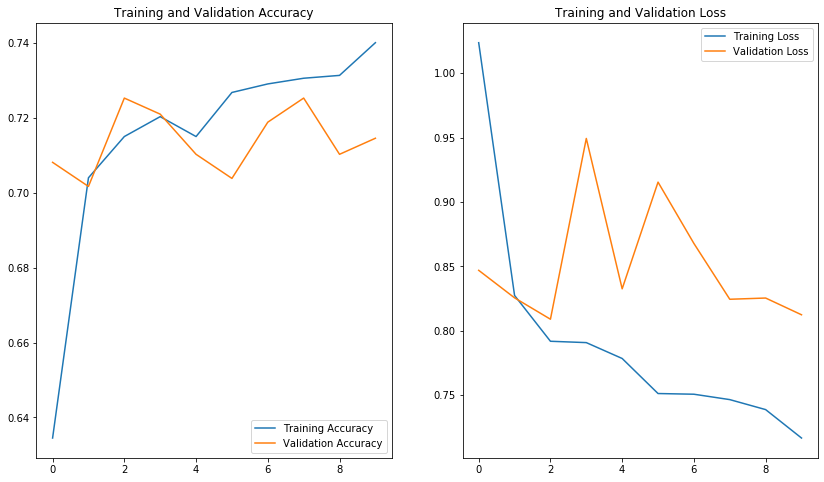

In [32]:
acc_loss_plot(history_old, epochs)